# Import Nessesory Libries

In [181]:
# import all the nessecery libries for machine learning project
import pandas as pd

# Import Data Sets

In [182]:
# Import data set
outlet_data=pd.read_csv('Data Storn - Semi final data sets/outlets_data.csv')
freezer_data=pd.read_csv('Data Storn - Semi final data sets/freezer_data.csv')
product_data=pd.read_csv('Data Storn - Semi final data sets/product_data.csv')
sales_data=pd.read_csv('Data Storn - Semi final data sets/sales_data.csv')
week_data=pd.read_csv('Data Storn - Semi final data sets/week_data.csv')



In [183]:
outlet_data

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100
...,...,...
983,ID4119,3858
984,ID2978,3495
985,ID6549,1141
986,ID1210,3322


In [184]:
# get count of null values in each column
null_counts = outlet_data.isnull().sum()
# print the counts
print(null_counts)

Outlet_ID     0
area(sqft)    0
dtype: int64


In [185]:
product_data

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100
5,BP1,1.0,Chocolate Fudge Big Scoop,1200
6,BP2,1.0,Moose Tracks Jumbo Cup,1100
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150
8,BP4,1.0,Rocky Road Mega Tub,1000
9,BP5,1.0,Cookies and Cream Mega Tub,1100


In [186]:
sales_data

,Outlet_ID,week,pid,product_name,no_units
0,ID7203,1,IP1,Vanilla Mini Cone,874.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0
...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0


In [187]:
# get count of null values in each column
null_counts = sales_data.isnull().sum()
# print the counts
print(null_counts)

Outlet_ID       0
week            0
pid             0
product_name    0
no_units        0
dtype: int64


In [188]:
week_data

,Week,Start Date,End Date
0,Week 1,1/2/2023,1/8/2023
1,Week 2,1/9/2023,1/15/2023
2,Week 3,1/16/2023,1/22/2023
3,Week 4,1/23/2023,1/29/2023
4,Week 5,1/30/2023,2/5/2023
5,Week 6,2/6/2023,2/12/2023
6,Week 7,2/13/2023,2/19/2023
7,Week 8,2/20/2023,2/26/2023
8,Week 9,2/27/2023,3/5/2023
9,Week 10,3/6/2023,3/12/2023


In [189]:
# get count of null values in each column
null_counts = week_data.isnull().sum()
# print the counts
print(null_counts)

Week          0
Start Date    0
End Date      0
dtype: int64


# Creating Dtaframes

#### create a data frame for each outlate and product

In [190]:
# create a data frame for each outlate and product
sales_grouped_outlats = sales_data.groupby(['Outlet_ID', 'pid'])['no_units'].sum().reset_index()


In [191]:
sales_grouped_outlats

,Outlet_ID,pid,no_units
0,ID1008,IP1,6970.0
1,ID1008,IP2,7206.0
2,ID1008,IP3,6285.0
3,ID1008,IP4,6486.0
4,ID1008,IP5,6055.0
...,...,...,...
7185,ID9980,IP1,6212.0
7186,ID9980,IP2,7888.0
7187,ID9980,IP3,4999.0
7188,ID9980,IP4,9370.0


In [192]:
# pivot the dataframe to make item_description values as columns
pivoted_df_sales = sales_grouped_outlats.pivot(index='Outlet_ID', columns='pid', values='no_units')

# fill NaN values with 0
pivoted_df_sales.fillna(0, inplace=True)

# resetting the index
pivoted_df_sales = pivoted_df_sales.reset_index()

In [193]:
pivoted_df_sales

pid,Outlet_ID,BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5
0,ID1008,0.0,0.0,0.0,0.0,0.0,6970.0,7206.0,6285.0,6486.0,6055.0
1,ID1012,636.0,713.0,795.0,572.0,559.0,0.0,0.0,0.0,0.0,0.0
2,ID1024,1703.0,1251.0,1150.0,1388.0,1451.0,0.0,0.0,0.0,0.0,0.0
3,ID1029,1659.0,2190.0,1891.0,1513.0,1109.0,9166.0,7577.0,9158.0,7961.0,6918.0
4,ID1036,567.0,583.0,725.0,564.0,722.0,4934.0,5708.0,6200.0,5526.0,5835.0
...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,1815.0,1878.0,1359.0,1958.0,2257.0,7142.0,6123.0,8809.0,5699.0,11328.0
947,ID9971,0.0,0.0,0.0,0.0,0.0,6390.0,6784.0,7786.0,9162.0,6361.0
948,ID9973,1411.0,1970.0,2001.0,1317.0,1870.0,7341.0,6473.0,8091.0,9850.0,7744.0
949,ID9979,0.0,0.0,0.0,0.0,0.0,5596.0,7372.0,6283.0,5740.0,6901.0


In [194]:
# add columns for each product to the outlet data frame

sales_grouped_outlats=(pd.merge(outlet_data, pivoted_df_sales, on='Outlet_ID', how='left'))

In [195]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5
0,ID7203,5660,0.0,0.0,0.0,0.0,0.0,6361.0,7295.0,9127.0,5520.0,6443.0
1,ID1878,4138,0.0,0.0,0.0,0.0,0.0,7860.0,6622.0,6856.0,7954.0,6748.0
2,ID1740,5546,0.0,0.0,0.0,0.0,0.0,7625.0,8116.0,7837.0,7192.0,6817.0
3,ID4366,5134,0.0,0.0,0.0,0.0,0.0,6530.0,6259.0,9232.0,8759.0,9524.0
4,ID8358,4100,0.0,0.0,0.0,0.0,0.0,7057.0,9562.0,7652.0,6241.0,8866.0
...,...,...,...,...,...,...,...,...,...,...,...,...
983,ID4119,3858,624.0,508.0,631.0,602.0,573.0,4179.0,5104.0,3951.0,4503.0,6038.0
984,ID2978,3495,634.0,503.0,655.0,682.0,679.0,4092.0,5710.0,4934.0,5006.0,4800.0
985,ID6549,1141,742.0,611.0,677.0,716.0,543.0,4932.0,6148.0,4826.0,5844.0,5935.0
986,ID1210,3322,519.0,532.0,664.0,608.0,677.0,4745.0,7020.0,5510.0,5246.0,5113.0


# Data Preprocessing

Outliers

#### creating fetures for total item solds for bulk and impuls item

In [196]:
sales_grouped_outlats['tot_bulk_itm'] = sales_grouped_outlats[['BP1', 'BP2', 'BP3', 'BP4', 'BP5']].sum(axis=1)
sales_grouped_outlats['tot_impulse_itm'] = sales_grouped_outlats[['IP1', 'IP2', 'IP3', 'IP4', 'IP5']].sum(axis=1)

In [197]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm
0,ID7203,5660,0.0,0.0,0.0,0.0,0.0,6361.0,7295.0,9127.0,5520.0,6443.0,0.0,34746.0
1,ID1878,4138,0.0,0.0,0.0,0.0,0.0,7860.0,6622.0,6856.0,7954.0,6748.0,0.0,36040.0
2,ID1740,5546,0.0,0.0,0.0,0.0,0.0,7625.0,8116.0,7837.0,7192.0,6817.0,0.0,37587.0
3,ID4366,5134,0.0,0.0,0.0,0.0,0.0,6530.0,6259.0,9232.0,8759.0,9524.0,0.0,40304.0
4,ID8358,4100,0.0,0.0,0.0,0.0,0.0,7057.0,9562.0,7652.0,6241.0,8866.0,0.0,39378.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,ID4119,3858,624.0,508.0,631.0,602.0,573.0,4179.0,5104.0,3951.0,4503.0,6038.0,2938.0,23775.0
984,ID2978,3495,634.0,503.0,655.0,682.0,679.0,4092.0,5710.0,4934.0,5006.0,4800.0,3153.0,24542.0
985,ID6549,1141,742.0,611.0,677.0,716.0,543.0,4932.0,6148.0,4826.0,5844.0,5935.0,3289.0,27685.0
986,ID1210,3322,519.0,532.0,664.0,608.0,677.0,4745.0,7020.0,5510.0,5246.0,5113.0,3000.0,27634.0


#### Creatng feature for Total Icecream Volume sold

In [198]:
sales_grouped_outlats['tot_icecream_vol']=(sales_grouped_outlats['tot_bulk_itm']*1.0)+(sales_grouped_outlats['tot_impulse_itm']*0.2)

In [199]:
sales_grouped_outlats[['area(sqft)','BP1', 'BP2', 'BP3', 'BP4', 'BP5','IP1', 'IP2', 'IP3', 'IP4', 'IP5','tot_bulk_itm','tot_impulse_itm']] = sales_grouped_outlats[['area(sqft)','BP1', 'BP2', 'BP3', 'BP4', 'BP5','IP1', 'IP2', 'IP3', 'IP4', 'IP5','tot_bulk_itm','tot_impulse_itm']].astype(int)

In [200]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol
0,ID7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2
1,ID1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0
2,ID1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4
3,ID4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8
4,ID8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,ID4119,3858,624,508,631,602,573,4179,5104,3951,4503,6038,2938,23775,7693.0
984,ID2978,3495,634,503,655,682,679,4092,5710,4934,5006,4800,3153,24542,8061.4
985,ID6549,1141,742,611,677,716,543,4932,6148,4826,5844,5935,3289,27685,8826.0
986,ID1210,3322,519,532,664,608,677,4745,7020,5510,5246,5113,3000,27634,8526.8


count the number of unique products sold per outlet

In [201]:
# count the number of unique products sold per outlet
num_products_df = sales_data.groupby('Outlet_ID')['pid'].nunique().reset_index()
num_products_df.columns = ['Outlet_ID', 'Num_Products_Sold']

# merge the new feature with the outlet data set
sales_grouped_outlats = sales_grouped_outlats.merge(num_products_df, on='Outlet_ID', how='left')



#### Create a feature for total revenew

In [202]:
product_data

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100
5,BP1,1.0,Chocolate Fudge Big Scoop,1200
6,BP2,1.0,Moose Tracks Jumbo Cup,1100
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150
8,BP4,1.0,Rocky Road Mega Tub,1000
9,BP5,1.0,Cookies and Cream Mega Tub,1100


In [203]:
sales_grouped_outlats['tot_revnew']=((sales_grouped_outlats['BP1']*1200)+(sales_grouped_outlats['BP2']*1100)+(sales_grouped_outlats['BP3']*1150)+(sales_grouped_outlats['BP4']*1000)+(sales_grouped_outlats['BP5']*1100)+(sales_grouped_outlats['IP1']*100)+(sales_grouped_outlats['IP2']*90)+(sales_grouped_outlats['IP3']*110)+(sales_grouped_outlats['IP4']*100)+(sales_grouped_outlats['IP5']*100)).astype(float)

In [204]:
sales_grouped_outlats

,Outlet_ID,area(sqft),BP1,BP2,BP3,BP4,BP5,IP1,IP2,IP3,IP4,IP5,tot_bulk_itm,tot_impulse_itm,tot_icecream_vol,Num_Products_Sold,tot_revnew
0,ID7203,5660,0,0,0,0,0,6361,7295,9127,5520,6443,0,34746,6949.2,5,3492920.0
1,ID1878,4138,0,0,0,0,0,7860,6622,6856,7954,6748,0,36040,7208.0,5,3606340.0
2,ID1740,5546,0,0,0,0,0,7625,8116,7837,7192,6817,0,37587,7517.4,5,3755910.0
3,ID4366,5134,0,0,0,0,0,6530,6259,9232,8759,9524,0,40304,8060.8,5,4060130.0
4,ID8358,4100,0,0,0,0,0,7057,9562,7652,6241,8866,0,39378,7875.6,5,3918700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,ID4119,3858,624,508,631,602,573,4179,5104,3951,4503,6038,2938,23775,7693.0,10,5631520.0
984,ID2978,3495,634,503,655,682,679,4092,5710,4934,5006,4800,3153,24542,8061.4,10,5942690.0
985,ID6549,1141,742,611,677,716,543,4932,6148,4826,5844,5935,3289,27685,8826.0,10,6409630.0
986,ID1210,3322,519,532,664,608,677,4745,7020,5510,5246,5113,3000,27634,8526.8,10,6072600.0


In [205]:
#sales_grouped_outlats = sales_grouped_outlats.drop(['BP1', 'BP2', 'BP3', 'BP4', 'BP5','IP1', 'IP2', 'IP3', 'IP4', 'IP5','tot_icecream_vol','tot_revnew'], axis=1)


### Vizualizing

C:\Users\Nadun kumarasinghe\AppData\Local\Temp\ipykernel_22524\1089919353.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales_grouped_outlats.corr()


Text(0.5, 1.0, 'Correlation Matrix')

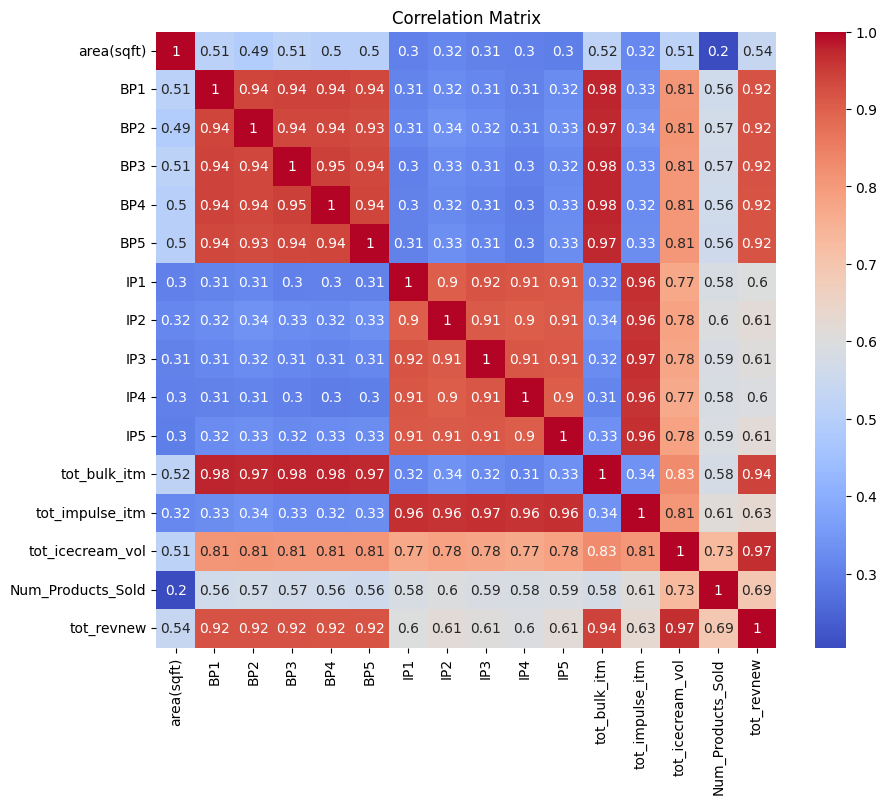

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = sales_grouped_outlats.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

Remove duplicates in outlets_data

In [207]:
# Group the DataFrame by column 'Outlet_ID' and get the groups with duplicates
groups = sales_grouped_outlats[['Outlet_ID','area(sqft)','tot_impulse_itm', 'tot_icecream_vol', 'tot_revnew']].groupby(['Outlet_ID']).filter(lambda x: len(x) > 1)

df_of_duplicates=pd.DataFrame()

# Iterate over the groups and print the duplicate rows
for name, group in groups.groupby(['Outlet_ID']):
    df_of_duplicates=df_of_duplicates.append(group)

C:\Users\Nadun kumarasinghe\AppData\Local\Temp\ipykernel_22524\1673593869.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups.groupby(['Outlet_ID']):
C:\Users\Nadun kumarasinghe\AppData\Local\Temp\ipykernel_22524\1673593869.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_of_duplicates=df_of_duplicates.append(group)
C:\Users\Nadun kumarasinghe\AppData\Local\Temp\ipykernel_22524\1673593869.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_of_duplicates=df_of_duplicates.append(group)
C:\Users\Nadun kumarasinghe\AppData\Local\Temp\ipykernel_22524\1673593869.py:8: FutureWarning: The frame.append method is d

In [208]:
df_of_duplicates

,Outlet_ID,area(sqft),tot_impulse_itm,tot_icecream_vol,tot_revnew
98,ID1365,5823,39285,11171.0,7603540.0
494,ID1365,1291,39285,11171.0,7603540.0
399,ID1429,1300,25391,11430.2,9571970.0
851,ID1429,2854,25391,11430.2,9571970.0
292,ID1485,4535,44778,24490.6,21663150.0
...,...,...,...,...,...
576,ID9672,7966,52240,26425.0,22981250.0
418,ID9841,578,25835,11691.0,9817490.0
916,ID9841,2179,25835,11691.0,9817490.0
449,ID9980,4256,37459,18727.8,16198010.0


In [209]:
print(df_of_duplicates.describe())
num_zeros = df_of_duplicates.eq(0).sum()
print(num_zeros)

        area(sqft)  tot_impulse_itm  tot_icecream_vol    tot_revnew
count    74.000000        74.000000         74.000000  7.400000e+01
mean   4600.797297     50594.648649      20331.740541  1.639028e+07
std    2701.819326     19461.398446       6544.804174  5.595174e+06
min     145.000000         0.000000       9466.000000  7.063010e+06
25%    2209.500000     38603.000000      15057.200000  1.272428e+07
50%    4537.500000     46791.000000      22069.000000  1.759203e+07
75%    6597.500000     67224.000000      24981.000000  1.963119e+07
max    9831.000000     85510.000000      40760.000000  3.477513e+07
Outlet_ID           0
area(sqft)          0
tot_impulse_itm     2
tot_icecream_vol    0
tot_revnew          0
dtype: int64


In [210]:
predict = df_of_duplicates[['Outlet_ID','tot_impulse_itm', 'tot_icecream_vol', 'tot_revnew','area(sqft)']]

In [211]:
import numpy as np

predict['area(sqft)'] = np.nan

In [212]:
predict

,Outlet_ID,tot_impulse_itm,tot_icecream_vol,tot_revnew,area(sqft)
98,ID1365,39285,11171.0,7603540.0,NaN
494,ID1365,39285,11171.0,7603540.0,NaN
399,ID1429,25391,11430.2,9571970.0,NaN
851,ID1429,25391,11430.2,9571970.0,NaN
292,ID1485,44778,24490.6,21663150.0,NaN
...,...,...,...,...,...
576,ID9672,52240,26425.0,22981250.0,NaN
418,ID9841,25835,11691.0,9817490.0,NaN
916,ID9841,25835,11691.0,9817490.0,NaN
449,ID9980,37459,18727.8,16198010.0,NaN


To split the train dataset into two separate dataframes train_x and train_y

In [213]:
num_zeros = sales_grouped_outlats.eq(0).sum()
print(num_zeros)

Outlet_ID              0
area(sqft)             0
BP1                  235
BP2                  235
BP3                  235
BP4                  235
BP5                  235
IP1                  230
IP2                  230
IP3                  230
IP4                  230
IP5                  230
tot_bulk_itm         235
tot_impulse_itm      230
tot_icecream_vol       0
Num_Products_Sold      0
tot_revnew             0
dtype: int64


In [214]:
# create bulk_items_data data frame
bulk_items_data = sales_grouped_outlats[sales_grouped_outlats['tot_bulk_itm'] != 0]

# create impulse_items_data data frame
impulse_items_data = sales_grouped_outlats[sales_grouped_outlats['tot_impulse_itm'] != 0]

 Regression

In [215]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Split into features and target
# X = bulk_items_data[['tot_bulk_itm', 'tot_icecream_vol', 'tot_revnew']]
# y = bulk_items_data['area(sqft)']

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Train and evaluate the RandomForestRegressor model with hyperparameter tuning
# rf = RandomForestRegressor(random_state=42)
# grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and evaluate the model on the testing set
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f'Random Forest:\nMSE: {mse}\nR^2: {r2}\n')


In [216]:
predict.drop_duplicates(subset='Outlet_ID', keep='first', inplace=True)


In [217]:
predict

,Outlet_ID,tot_impulse_itm,tot_icecream_vol,tot_revnew,area(sqft)
98,ID1365,39285,11171.0,7603540.0,NaN
399,ID1429,25391,11430.2,9571970.0,NaN
292,ID1485,44778,24490.6,21663150.0,NaN
400,ID1543,42122,21142.4,18341640.0,NaN
369,ID1750,27082,15156.4,13525100.0,NaN
615,ID2074,71200,26438.0,20631800.0,NaN
445,ID2077,45009,20019.8,16728200.0,NaN
310,ID2170,38603,22870.6,20714290.0,NaN
74,ID2819,67224,16864.8,10527440.0,NaN
216,ID3127,67432,23105.4,17331370.0,NaN


In [218]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split into features and target
X = impulse_items_data[['tot_impulse_itm', 'tot_icecream_vol', 'tot_revnew']]
y = impulse_items_data['area(sqft)']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Train and evaluate the RandomForestRegressor model with hyperparameter tuning
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and evaluate the model on the testing set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Random Forest:\nMSE: {mse}\nR^2: {r2}\n')

# Split into features and target
X_pred = predict[['tot_impulse_itm', 'tot_icecream_vol', 'tot_revnew']]



Random Forest:
MSE: 2521688.121855449
R^2: 0.5399779727658914



In [219]:
# Predict using the trained Random Forest Regressor model
y_pred = best_rf.predict(X_pred)

# Print the predicted values
print(y_pred)


[3482.20324576 2557.75236651 6547.49747657 5725.07327184 4637.26376114
 5038.25553314 6224.65601784 6229.76734605 3014.23797786 4161.01269969
 5921.43895479 4602.86560353 5509.95154941 5333.87605581 3526.351492
 6487.03008554 4717.71756223 2830.94043121 5264.10498104 4181.66682182
 6153.82138304 5236.67590235 4327.23937994 4848.53971235 5001.97305762
 2780.16989001 4656.69774025 5373.52408336 4843.25989934 2552.86420292
 6165.99916203 3470.2636916  5633.79812434 5012.10832361 7181.74507474
 2645.61412002 6431.20419591]


In [220]:
df_of_duplicates

,Outlet_ID,area(sqft),tot_impulse_itm,tot_icecream_vol,tot_revnew
98,ID1365,5823,39285,11171.0,7603540.0
494,ID1365,1291,39285,11171.0,7603540.0
399,ID1429,1300,25391,11430.2,9571970.0
851,ID1429,2854,25391,11430.2,9571970.0
292,ID1485,4535,44778,24490.6,21663150.0
...,...,...,...,...,...
576,ID9672,7966,52240,26425.0,22981250.0
418,ID9841,578,25835,11691.0,9817490.0
916,ID9841,2179,25835,11691.0,9817490.0
449,ID9980,4256,37459,18727.8,16198010.0


In [221]:

# Replace null values in predict['area(sqft)'] with predicted values from y_pred
predict['area(sqft)'][np.isnan(predict['area(sqft)'])] = y_pred


C:\Users\Nadun kumarasinghe\AppData\Local\Temp\ipykernel_22524\1710498816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict['area(sqft)'][np.isnan(predict['area(sqft)'])] = y_pred


In [222]:
predict[['Outlet_ID','area(sqft)']]

,Outlet_ID,area(sqft)
98,ID1365,3482.203246
399,ID1429,2557.752367
292,ID1485,6547.497477
400,ID1543,5725.073272
369,ID1750,4637.263761
615,ID2074,5038.255533
445,ID2077,6224.656018
310,ID2170,6229.767346
74,ID2819,3014.237978
216,ID3127,4161.012700


In [223]:
# Iterate through each unique Outlet_ID in df_of_duplicates
for outlet_id in df_of_duplicates['Outlet_ID'].unique():
    
    # Get the predicted area for the current Outlet_ID from predict dataframe
    predicted_area = predict.loc[predict['Outlet_ID'] == outlet_id, 'area(sqft)'].values[0]
    
    # Get the two area values from df_of_duplicates for the current Outlet_ID
    area_values = df_of_duplicates.loc[df_of_duplicates['Outlet_ID'] == outlet_id, 'area(sqft)'].values
    
    # Calculate the absolute difference between the predicted area and the two area values from df_of_duplicates
    diff1 = abs(predicted_area - area_values[0])
    diff2 = abs(predicted_area - area_values[1])
    
    # Determine which area value is closer to the predicted area
    if diff1 < diff2:
        # Drop the row with the second area value
        df_of_duplicates = df_of_duplicates.drop(df_of_duplicates.loc[(df_of_duplicates['Outlet_ID'] == outlet_id) & 
                                                                        (df_of_duplicates['area(sqft)'] == area_values[1])].index)
    else:
        # Drop the row with the first area value
        df_of_duplicates = df_of_duplicates.drop(df_of_duplicates.loc[(df_of_duplicates['Outlet_ID'] == outlet_id) & 
                                                                        (df_of_duplicates['area(sqft)'] == area_values[0])].index)


In [224]:
df_of_duplicates

,Outlet_ID,area(sqft),tot_impulse_itm,tot_icecream_vol,tot_revnew
494,ID1365,1291,39285,11171.0,7603540.0
851,ID1429,2854,25391,11430.2,9571970.0
292,ID1485,4535,44778,24490.6,21663150.0
593,ID1543,7431,42122,21142.4,18341640.0
877,ID1750,1093,27082,15156.4,13525100.0
615,ID2074,6190,71200,26438.0,20631800.0
445,ID2077,4641,45009,20019.8,16728200.0
525,ID2170,6169,38603,22870.6,20714290.0
866,ID2819,1899,67224,16864.8,10527440.0
698,ID3127,4540,67432,23105.4,17331370.0


In [225]:
df_of_duplicates[['Outlet_ID','area(sqft)']]

,Outlet_ID,area(sqft)
494,ID1365,1291
851,ID1429,2854
292,ID1485,4535
593,ID1543,7431
877,ID1750,1093
615,ID2074,6190
445,ID2077,4641
525,ID2170,6169
866,ID2819,1899
698,ID3127,4540


In [226]:
df_of_duplicates.to_csv('duplicates_predicted.csv')